In [5]:
import sklearn

print("Scikit-Learn : {}".format(sklearn.__version__))

import scikitplot as skplt

print("Scikit-Plot Version : {}".format(skplt.__version__))

import joblib

print("Joblib Version : {}".format(joblib.__version__))

import matplotlib.pyplot as plt

Scikit-Learn : 1.2.2
Scikit-Plot Version : 0.3.7
Joblib Version : 1.1.1


In [6]:
from sklearn import datasets

news_groups = datasets.fetch_20newsgroups()

news_groups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [7]:
news_groups = datasets.fetch_20newsgroups(categories=['alt.atheism', 'comp.graphics', 'rec.autos',
                                                      'sci.electronics', 'talk.politics.guns',])

news_groups.target_names

['alt.atheism',
 'comp.graphics',
 'rec.autos',
 'sci.electronics',
 'talk.politics.guns']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(news_groups.data, news_groups.target, train_size=0.8,
                                                    random_state=123)

len(X_train), len(X_test), len(Y_train), len(Y_test)

(2236, 559, 2236, 559)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=50_000)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

X_train_vec.shape, X_test_vec.shape

((2236, 38096), (559, 38096))

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_classif = RandomForestClassifier()

rf_classif.fit(X_train_vec, Y_train)

RandomForestClassifier()

In [11]:
Y_test_preds = rf_classif.predict(X_test_vec)

Y_test_preds[:5]

array([2, 4, 3, 0, 4], dtype=int64)

In [12]:
Y_train_preds = rf_classif.predict(X_train_vec)

Y_train_preds[:5]

array([0, 1, 4, 3, 0], dtype=int64)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Test  Accuracy : {:.2f}".format(accuracy_score(Y_test, Y_test_preds)))
print("Train Accuracy : {:.2f}".format(accuracy_score(Y_train, Y_train_preds)))

print("\nConfusion Matrix :")
print(confusion_matrix(Y_test, Y_test_preds))

print("\nClassification Report :")
print(classification_report(Y_test, Y_test_preds, target_names=news_groups.target_names))

Test  Accuracy : 0.91
Train Accuracy : 1.00

Confusion Matrix :
[[ 87   2   1   1   1]
 [  1 118   1   1   1]
 [  0   8 112   2   2]
 [  0  16   4  93   0]
 [  1   3   1   4  99]]

Classification Report :
                    precision    recall  f1-score   support

       alt.atheism       0.98      0.95      0.96        92
     comp.graphics       0.80      0.97      0.88       122
         rec.autos       0.94      0.90      0.92       124
   sci.electronics       0.92      0.82      0.87       113
talk.politics.guns       0.96      0.92      0.94       108

          accuracy                           0.91       559
         macro avg       0.92      0.91      0.91       559
      weighted avg       0.92      0.91      0.91       559



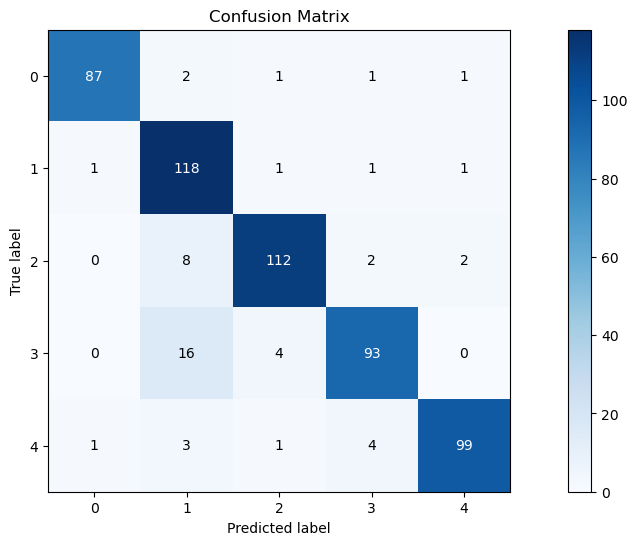

In [14]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(111)

skplt.metrics.plot_confusion_matrix(Y_test, Y_test_preds, ax=ax1);

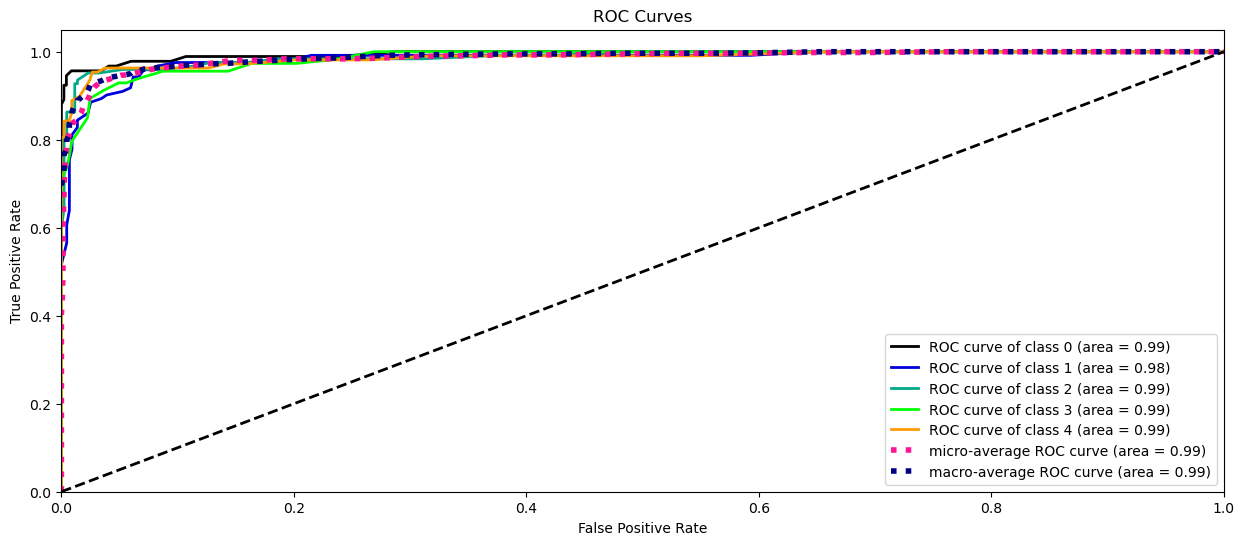

In [15]:
Y_test_probs = rf_classif.predict_proba(X_test_vec)

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(111)

skplt.metrics.plot_roc(Y_test, Y_test_probs, ax=ax1);

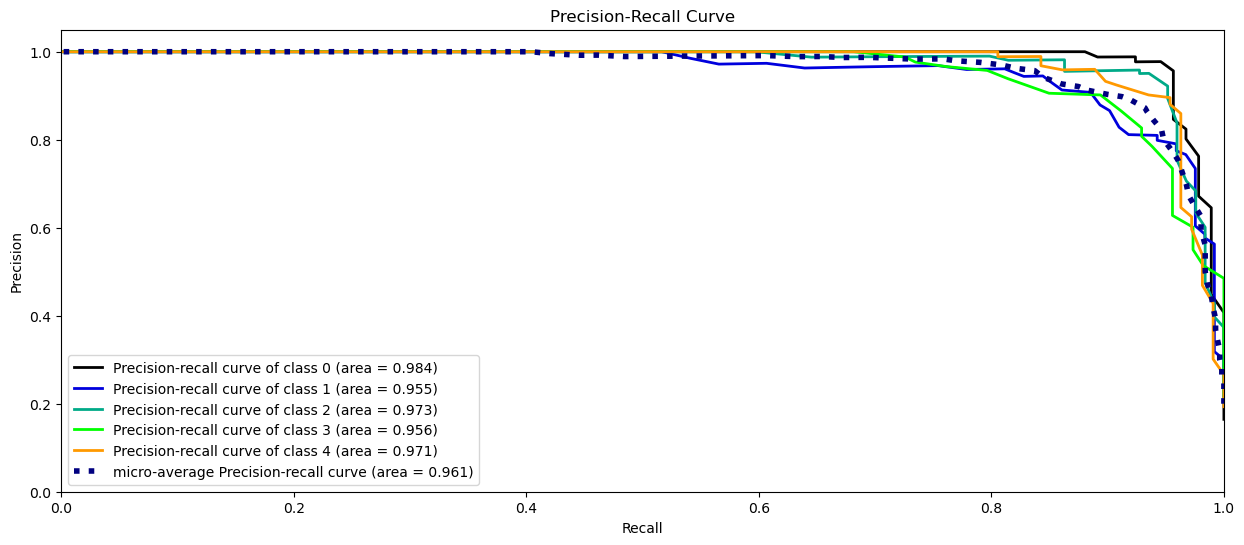

In [16]:
Y_test_probs = rf_classif.predict_proba(X_test_vec)

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(111)

skplt.metrics.plot_precision_recall(Y_test, Y_test_probs, ax=ax1);

In [17]:
from joblib import dump, load

dump(rf_classif, "rf_classif.model")

['rf_classif.model']

In [18]:
rf_classif_2 = load("rf_classif.model")

rf_classif_2

RandomForestClassifier()

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Y_train_preds = rf_classif_2.predict(X_train_vec)
Y_test_preds = rf_classif_2.predict(X_test_vec)

print("Test  Accuracy : {:.2f}".format(accuracy_score(Y_test, Y_test_preds)))
print("Train Accuracy : {:.2f}".format(accuracy_score(Y_train, Y_train_preds)))

print("\nConfusion Matrix :")
print(confusion_matrix(Y_test, Y_test_preds))

print("\nClassification Report :")
print(classification_report(Y_test, Y_test_preds))

Test  Accuracy : 0.91
Train Accuracy : 1.00

Confusion Matrix :
[[ 87   2   1   1   1]
 [  1 118   1   1   1]
 [  0   8 112   2   2]
 [  0  16   4  93   0]
 [  1   3   1   4  99]]

Classification Report :
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        92
           1       0.80      0.97      0.88       122
           2       0.94      0.90      0.92       124
           3       0.92      0.82      0.87       113
           4       0.96      0.92      0.94       108

    accuracy                           0.91       559
   macro avg       0.92      0.91      0.91       559
weighted avg       0.92      0.91      0.91       559

